In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 96
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = tf.image.resize(x_train[..., tf.newaxis], (IMAGE_SIZE, IMAGE_SIZE))
x_test = tf.image.resize(x_test[..., tf.newaxis], (IMAGE_SIZE, IMAGE_SIZE))

x_train = tf.image.grayscale_to_rgb(x_train)
x_test = tf.image.grayscale_to_rgb(x_test)

In [8]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 409s 268ms/step - accuracy: 0.8758 - loss: 0.4112 - val_accuracy: 0.9657 - val_loss: 0.1129
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 438s 266ms/step - accuracy: 0.9684 - loss: 0.1017 - val_accuracy: 0.9703 - val_loss: 0.0924
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 399s 266ms/step - accuracy: 0.9768 - loss: 0.0785 - val_accuracy: 0.9728 - val_loss: 0.0865
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 453s 273ms/step - accuracy: 0.9794 - loss: 0.0666 - val_accuracy: 0.9712 - val_loss: 0.0843
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 421s 259ms/step - accuracy: 0.9824 - loss: 0.0563 - val_accuracy: 0.9705 - val_loss: 0.0854
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 417s 278ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9728 - val_loss: 0.0816
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 453s 285ms/step - accuracy: 0.9844 - loss: 0.0474 - val_accuracy: 0.9733 - val_loss: 0.0826
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 420s 270ms/step - ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 244ms/step - accuracy: 0.9691 - loss: 0.0949
Test accuracy: 0.9735999703407288


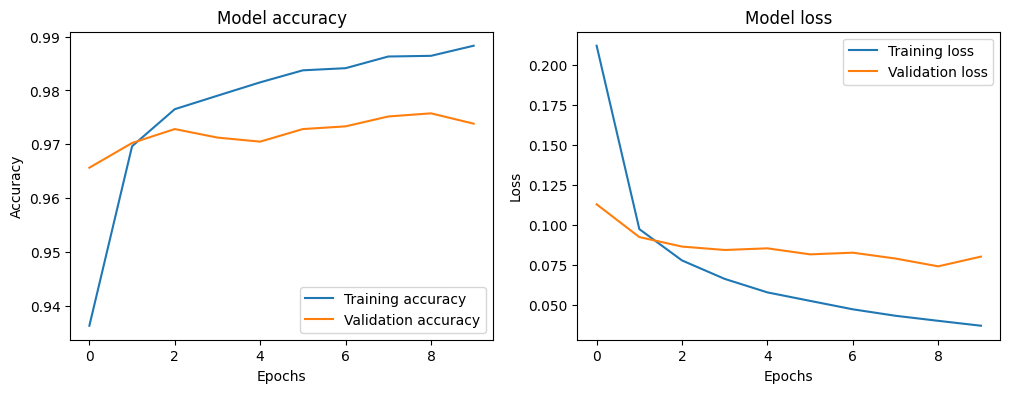

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()